# Subscribed YouTube Channels Data Scraping & Analysis

In [ ]:
!pip install google-api-python-client

## Importing the required libraries

In [1]:
import googleapiclient.discovery
import re
import pandas as pd

## Scraping the channels details

In [4]:
# YouTube Data API key
API_KEY = 'AI####yAT####Lm6iT###V7rwH6_cs###vjIJ***'

def get_channel_details(channel_id):
    youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=API_KEY)
    
    if channel_id.startswith('@'):
        # Fetching the channel ID using the username
        request = youtube.search().list(
            part='snippet',
            q=channel_id,
            type='channel'
        )
        response = request.execute()
        if not response.get('items'):
            return None
        channel_id = response['items'][0]['id']['channelId']
    
    request = youtube.channels().list(
        part="snippet,statistics,brandingSettings",
        id=channel_id
    )
    response = request.execute()

    if 'items' not in response or not response['items']:
        return None
    
    channel_info = response['items'][0]
    channel_name = channel_info['snippet']['title']
    subscriber_count = channel_info['statistics'].get('subscriberCount', 'hidden')
    total_views = channel_info['statistics']['viewCount']
    video_count = channel_info['statistics']['videoCount']
    
    contact_email = None
    description = channel_info['snippet'].get('description', '')
    email_pattern = r'[\w\.-]+@[\w\.-]+'
    emails = re.findall(email_pattern, description)
    if emails:
        contact_email = emails[0]
    
    return {
        'channel_name': channel_name,
        'subscriber_count': subscriber_count,
        'total_views': total_views,
        'contact_email': contact_email,
        'video_count': video_count
    }

def get_multiple_channel_details(channel_ids):
    details_list = []
    for channel_id in channel_ids:
        details = get_channel_details(channel_id)
        if details:
            details_list.append(details)
    return details_list

# YouTube channel IDs to fetch details for
yt_channel_ids = ['@ThinkSchool', '@veritasium', '@aliabdaal','@UpFlip','@MrBeast',
              '@TheDiaryOfACEO', '@TheEconomist', '@MarkRober', '@littlebitbetter7', '@tech___zone',
              '@CNBC', '@PowerRangersOfficial', '@TheQ_original', '@MagnatesMedia', '@ColdFusion',
              '@HowMoneyWorks', '@JordanWelch', '@techTFQ', '@mo-chen', '@datalab365',
              '@inventus', '@ThatWasEpic11', '@HowtoPowerBI', '@WIRED', '@FutureTechOfficial',
              '@NeuralNine', '@Design.Theory', '@QuantumTech', '@RyanNolanData', '@Thuvu5',
              '@TechJoint', '@herdataproject', '@absentdata', '@SQLBI', '@hotdealsexpress2174',
              '@KenjiExplains', '@PowerBIPro', '@TheDetailGeek', '@Top10Zone', '@smarttechus',
              '@iCreatived', '@sdw-online', '@TEDx', '@mrdbourke', '@zackdfilms', 
              '@excelisland', '@BusinessCasual', '@littlebitbetter7', '@datatutorials1', '@ZefasBi-Analytics',
              '@digitalcreatorblue', '@5MINUTEREPAIR', '@TheRichDadChannel', '@WheelsFactory', '@LauraFarms',
              '@Machina_Official', '@SteveMcDonaldArtsandCrafts', '@comedycentraluk', '@MechanicSteve', '@LowBudgetSkills',
              '@beyond.education', '@craftspeople', '@CNBCMakeIt', '@SamuelLeeds', '@AmazingTechnologySkills',
              '@Psych2go', '@freshtech_video', '@TechMomentss', '@SOBEIT32AD', '@coupleracademy', 
              '@AI_Entrepreneurs', '@freecodecamp', '@JimKwik', '@ATrueStory', '@AddyologyLifehacks', 
              '@AdventuresWithPurpose', '@aimagriculture6171', '@AlexTheAnalyst', '@Best_Tech_Gadgets', '@EconomicsExplained',
              '@great_history', '@hook', '@PolyMatter', '@powerdrive3213', '@Presello', 
              '@ProactiveThinker', '@RandomHands', '@RealLifeLore', '@shiba_cat_s', '@TechFreezeOfficial', 
              '@UrDay', '@WheelsFactory', '@WholesaleTed', '@The_Object', '@mr.process']  

channel_details_list = get_multiple_channel_details(yt_channel_ids)

# Converting the list of dictionaries to a DataFrame
df = pd.DataFrame(channel_details_list)

# Ensuring the DataFrame is in the correct order
df = df.reset_index(drop=True)


df


# Saving the DataFrame to a CSV file
df.to_csv('youtube_channel_details.csv', index=False)


In [12]:
df_channels = df
df_channels

,channel_name,subscriber_count,total_views,contact_email,video_count
0,Think School,4230000,403512133,parsh@thethinkschool.com,418
1,Veritasium,16600000,2886338575,None,413
2,Ali Abdaal,5940000,458027745,None,1033
3,UpFlip,1190000,115580732,media@upflip.com.,211
4,MrBeast,327000000,62538722343,None,825
...,...,...,...,...,...
89,UrDay,1960000,1864482035,None,210
90,Wheels Factory,2650000,254623151,None,704
91,Wholesale Ted,1290000,60421392,None,251
92,YT Object,5610000,6593468328,None,488


## Converting certain columns(subscriber_count, total_views, video_count) to numeric and filling nulls with 0

In [14]:
df_channels['subscriber_count'] = pd.to_numeric(df_channels['subscriber_count'],errors = 'coerce').fillna(0).astype(int)
df_channels['total_views'] = pd.to_numeric(df_channels['total_views'], errors = 'coerce').fillna(0).astype(int).abs()
df_channels['video_count'] = pd.to_numeric(df_channels['video_count'], errors = 'coerce').fillna(0).astype(int) 
df_channels

,channel_name,subscriber_count,total_views,contact_email,video_count
0,Think School,4230000,403512133,parsh@thethinkschool.com,418
1,Veritasium,16600000,1408628721,None,413
2,Ali Abdaal,5940000,458027745,None,1033
3,UpFlip,1190000,115580732,media@upflip.com.,211
4,MrBeast,327000000,1885787097,None,825
...,...,...,...,...,...
89,UrDay,1960000,1864482035,None,210
90,Wheels Factory,2650000,254623151,None,704
91,Wholesale Ted,1290000,60421392,None,251
92,YT Object,5610000,1996466264,None,488


In [20]:
df_channels = df_channels[['channel_name', 'subscriber_count', 'total_views', 'video_count']]
df_channels

,channel_name,subscriber_count,total_views,video_count
0,Think School,4230000,403512133,418
1,Veritasium,16600000,1408628721,413
2,Ali Abdaal,5940000,458027745,1033
3,UpFlip,1190000,115580732,211
4,MrBeast,327000000,1885787097,825
...,...,...,...,...
89,UrDay,1960000,1864482035,210
90,Wheels Factory,2650000,254623151,704
91,Wholesale Ted,1290000,60421392,251
92,YT Object,5610000,1996466264,488


## Adding a new column avg_views_per_video

In [26]:
df_channels['avg_views_per_video'] = df_channels['total_views'] // df_channels['video_count'].fillna(0)
df_channels

,channel_name,subscriber_count,total_views,video_count,avg_views_per_video
0,Think School,4230000,403512133,418,965340
1,Veritasium,16600000,1408628721,413,3410723
2,Ali Abdaal,5940000,458027745,1033,443395
3,UpFlip,1190000,115580732,211,547775
4,MrBeast,327000000,1885787097,825,2285802
...,...,...,...,...,...
89,UrDay,1960000,1864482035,210,8878485
90,Wheels Factory,2650000,254623151,704,361680
91,Wholesale Ted,1290000,60421392,251,240722
92,YT Object,5610000,1996466264,488,4091119


## Loading the data into the Microsoft SQL Server Management Studio

### Creating a connection

In [29]:
import sqlalchemy

connection_string = (
    r"mssql+pyodbc://PHYLLIAN\SQLEXPRESS/yt_data"
    "?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
)

# Creating SQLAlchemy engine
engine = sqlalchemy.create_engine(connection_string)

# Connecting to the database
conn = engine.connect()

print("Connection successful!")

conn.close()

Connection successful!


### Loading data into SQL

In [30]:
df_channels.to_sql("channels_data",con=engine, index=False,if_exists="replace") 

-1

## Eploratory Data Analysis

In [34]:
df_channels = df_channels.sort_values(by='avg_views_per_video', ascending=False).reset_index(drop=True)
df_channels.head(20)

,channel_name,subscriber_count,total_views,video_count,avg_views_per_video
0,Random Hands,6160000,1302543881,135,9648473
1,UrDay,1960000,1864482035,210,8878485
2,Tech Moments,1550000,1747362412,247,7074341
3,Low Budget Skills,1050000,520377615,123,4230712
4,RealLifeLore,7620000,1718804284,409,4202455
5,YT Object,5610000,1996466264,488,4091119
6,ThatWasEpic,7800000,1333436971,367,3633343
7,Amazing Technology & Skills,1960000,654701060,188,3482452
8,Veritasium,16600000,1408628721,413,3410723
9,Quantum Tech HD,14900000,1368501372,435,3145980


### Checking for null values

In [37]:
df_channels.describe()

,subscriber_count,total_views,video_count,avg_views_per_video
count,9.400000e+01,9.400000e+01,94.000000,9.400000e+01
mean,7.262964e+06,4.583477e+08,3429.436170,9.447960e+05
std,3.429268e+07,6.315541e+08,23105.630272,1.733462e+06
min,2.400000e+01,8.344000e+03,16.000000,3.560000e+02
25%,2.437500e+05,2.502802e+07,210.250000,4.767925e+04
50%,1.145000e+06,1.215733e+08,356.000000,2.899460e+05
75%,3.702500e+06,5.387953e+08,810.250000,9.357740e+05
max,3.270000e+08,2.095673e+09,223965.000000,9.648473e+06


In [35]:
null_count = df_channels.isnull().sum()
null_count

channel_name           0
subscriber_count       0
total_views            0
video_count            0
avg_views_per_video    0
dtype: int64

### Checking for duplicates

In [36]:
duplicates = df_channels[df_channels.duplicated()]
duplicates

,channel_name,subscriber_count,total_views,video_count,avg_views_per_video
35,LITTLE BIT BETTER,873000,48635409,94,517397
41,Wheels Factory,2650000,254623151,704,361680


In [38]:
df_channels = df_channels.drop_duplicates()

In [39]:
df_channels.describe()

,subscriber_count,total_views,video_count,avg_views_per_video
count,9.200000e+01,9.200000e+01,92.000000,9.200000e+01
mean,7.382561e+06,4.650155e+08,3495.315217,9.557799e+05
std,3.465742e+07,6.366169e+08,23353.699745,1.750733e+06
min,2.400000e+01,8.344000e+03,16.000000,3.560000e+02
25%,2.380000e+05,2.272508e+07,210.750000,4.366550e+04
50%,1.145000e+06,1.215733e+08,356.000000,2.607995e+05
75%,3.770000e+06,5.491558e+08,825.500000,9.667345e+05
max,3.270000e+08,2.095673e+09,223965.000000,9.648473e+06


In [41]:
df_channels.shape

(92, 5)

### Correlation analysis

In [45]:
correlation_matrix = df_channels[['subscriber_count','total_views', 'video_count', 'avg_views_per_video']].corr()
correlation_matrix

,subscriber_count,total_views,video_count,avg_views_per_video
subscriber_count,1.000000,0.298339,0.105936,0.112507
total_views,0.298339,1.000000,0.055877,0.568869
video_count,0.105936,0.055877,1.000000,-0.071108
avg_views_per_video,0.112507,0.568869,-0.071108,1.000000


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

### Outlier Detection

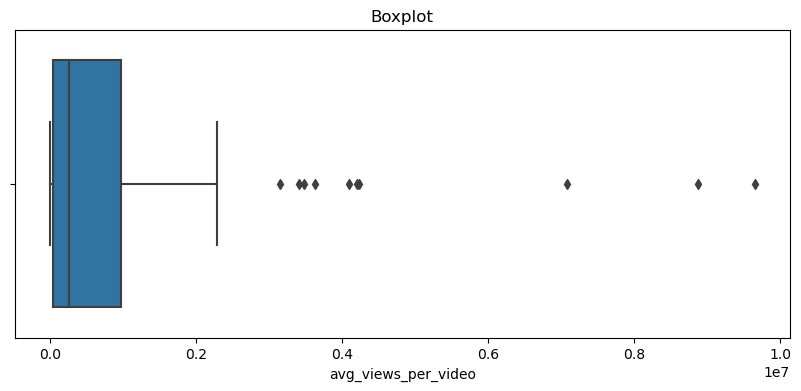

In [50]:
plt.figure(figsize=(10, 4))

sns.boxplot(x = df_channels['avg_views_per_video'])

plt.title('Boxplot')
plt.show()

## Comparative Analysis

In [53]:
df_channels['subscriber_category'] = pd.cut(df_channels['subscriber_count'], bins=[0,10000,100000,1000000,float('inf')], labels=['low', 'medium', 'high', 'very_high'])

In [60]:
category_avg_views = df_channels.groupby('subscriber_category')['avg_views_per_video'].mean().round(0)
category_avg_views

subscriber_category
low             3363.0
medium         15239.0
high          268742.0
very_high    1650425.0
Name: avg_views_per_video, dtype: float64

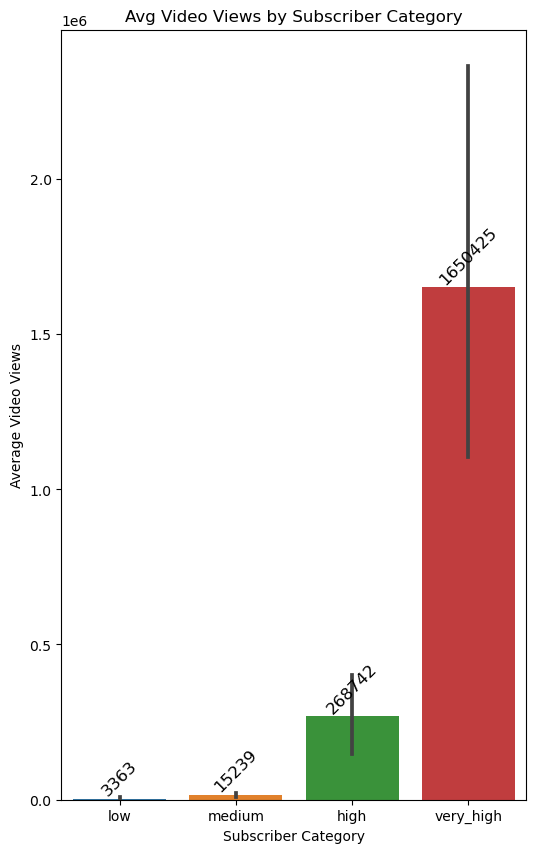

In [65]:
plt.figure(figsize = (6,10))

sns.barplot(x = 'subscriber_category', y = 'avg_views_per_video', data = df_channels)
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f"{height:.0f}", ha='center', va='bottom', rotation=45, fontsize=12)

plt.title('Avg Video Views by Subscriber Category')
plt.xlabel('Subscriber Category')
plt.ylabel('Average Video Views')
plt.show()

## Machine Learning – Predicting avg_views_per_video

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [68]:
x = df_channels[['subscriber_count', 'total_views', 'video_count']]
y = df_channels['avg_views_per_video']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42 )

In [69]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [71]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4141678648900.296


In [73]:
feature_importance = pd.Series(model.coef_, index=x.columns)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 subscriber_count    0.003046
total_views         0.001672
video_count        -7.223351
dtype: float64
